# Preprocesamiento

In [1]:
# Números
import pandas as pd
import numpy as np

# Visualizaciones
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 12
import seaborn as sns
sns.set_style("darkgrid")
mpl.style.use('ggplot')
# Paletas
from matplotlib.colors import ListedColormap
from palettable.wesanderson import FantasticFox1_5, Moonrise5_6

# Preprocesamiento
# Imputación de faltantes
import statsmodels.imputation.mice as sim

In [2]:
path_original = "..\\data\\original\\"
path_proc =  "..\\data\\processed\\"
path_ext = "..\\data\\external\\"

Wes palettes python: https://jiffyclub.github.io/palettable/wesanderson/

In [3]:
# Paletas a usar: contínua y discreta
FFox = FantasticFox1_5.mpl_colors # callable
FFoxC = FantasticFox1_5.mpl_colormap
FFoxD = ListedColormap(FantasticFox1_5.mpl_colors)

Moon = Moonrise5_6.mpl_colors # callable
MoonC =  Moonrise5_6.mpl_colormap
MoonD = ListedColormap( Moonrise5_6.mpl_colors)

## Dataset de trabajo

In [4]:
data = pd.read_csv(path_proc + "data_filter.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13479 entries, 0 to 13478
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13479 non-null  int64  
 1   REGION    13479 non-null  int64  
 2   SEX       13479 non-null  int64  
 3   AHEIGHT   12711 non-null  float64
 4   AWEIGHTP  12497 non-null  float64
 5   BMI       12470 non-null  float64
 6   AGE_P     13479 non-null  int64  
 7   RACERPI2  13479 non-null  int64  
 8   R_MARITL  13450 non-null  float64
 9   DOINGLWA  13471 non-null  float64
 10  WRKLYR4   13459 non-null  float64
 11  HYPYR1    13459 non-null  float64
 12  HYPMED2   13479 non-null  float64
 13  CHLYR     13427 non-null  float64
 14  CHLMDNW2  13479 non-null  float64
 15  ANGEV     13468 non-null  float64
 16  MIEV      13472 non-null  float64
 17  HRTEV     13474 non-null  float64
 18  STREV     13478 non-null  float64
 19  EPHEV     13477 non-null  float64
 20  COPDEV    13477 non-null  fl

## Datos faltantes

Se utiliza la técnica MICE para imputación. 
- Paquete utilizado: https://kite.com/python/docs/statsmodels.imputation.mice
- Bibliografía: Azur, M. J., Stuart, E. A., Frangakis, C., & Leaf, P. J. (2011). Multiple imputation by chained equations: what is it and how does it work? International Journal of Methods in Psychiatric Research, 20(1), 40–49. https://doi.org/10.1002/mpr.329

In [5]:
# Porcentaje de faltantes
round(data.isna().sum() * 100 / len(data),2)

id          0.00
REGION      0.00
SEX         0.00
AHEIGHT     5.70
AWEIGHTP    7.29
BMI         7.49
AGE_P       0.00
RACERPI2    0.00
R_MARITL    0.22
DOINGLWA    0.06
WRKLYR4     0.15
HYPYR1      0.15
HYPMED2     0.00
CHLYR       0.39
CHLMDNW2    0.00
ANGEV       0.08
MIEV        0.05
HRTEV       0.04
STREV       0.01
EPHEV       0.01
COPDEV      0.01
ASP         0.03
AASSTILL    0.06
ULCYR       0.02
DIBEV1      0.02
DIBPILL1    0.01
INSLN1      0.00
AHAYFYR     0.06
SINYR       0.03
CBRCHYR     0.01
KIDWKYR     0.00
LIVYR       0.03
ARTH1       0.04
PAINECK     0.01
PAINLB      0.01
PAINFACE    0.00
FLA1AR      0.14
CIGSDAY     0.00
VIG         1.69
MOD         2.92
ALC         0.00
APOX        4.71
AHEP        1.45
LIVEV       1.39
ASICPUSE    1.49
ASISLEEP    2.40
target      0.00
dtype: float64

In [6]:
# Imputación
imp = sim.MICEData(data)
# Exportar dataset imputado
imp.data.to_csv(path_proc + "data_imp.csv", index=False)

In [7]:
data = pd.read_csv(path_proc + "data_imp.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13479 entries, 0 to 13478
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13479 non-null  int64  
 1   REGION    13479 non-null  int64  
 2   SEX       13479 non-null  int64  
 3   AHEIGHT   13479 non-null  float64
 4   AWEIGHTP  13479 non-null  float64
 5   BMI       13479 non-null  float64
 6   AGE_P     13479 non-null  int64  
 7   RACERPI2  13479 non-null  int64  
 8   R_MARITL  13479 non-null  float64
 9   DOINGLWA  13479 non-null  float64
 10  WRKLYR4   13479 non-null  float64
 11  HYPYR1    13479 non-null  float64
 12  HYPMED2   13479 non-null  float64
 13  CHLYR     13479 non-null  float64
 14  CHLMDNW2  13479 non-null  float64
 15  ANGEV     13479 non-null  float64
 16  MIEV      13479 non-null  float64
 17  HRTEV     13479 non-null  float64
 18  STREV     13479 non-null  float64
 19  EPHEV     13479 non-null  float64
 20  COPDEV    13479 non-null  fl

In [8]:
# Corrige BMI
data.BMI = round(data.AWEIGHTP / np.power((data.AHEIGHT/100),2),2)

In [9]:
# Exportar dataset imputado
data.to_csv(path_proc + "data_imp.csv", index=False)

## Datos atípicos

### Univariados

Se buscarán datos atípicos en las variables contínuas.

In [10]:
data = pd.read_csv(path_proc + "data_imp.csv")

In [11]:
cont = data[["AHEIGHT","AWEIGHTP","BMI","AGE_P","CIGSDAY","VIG","MOD","ALC","ASISLEEP"]]

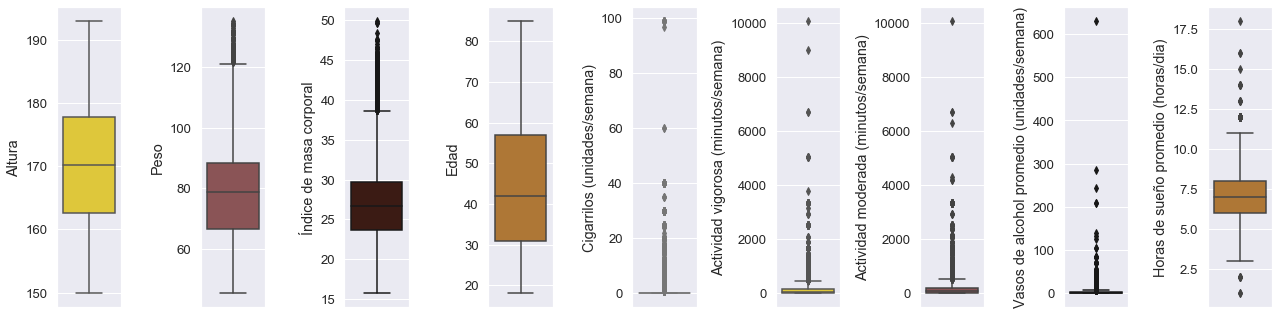

In [12]:
# Tamaño
sns.set(rc={"figure.figsize": (18, 5)})
sns.set(font_scale = 1.2)
# Figura y ejes
f, axes = plt.subplots(1, 9, sharex=False)
axes = axes.flatten()
# Colores
pal = FFox * 2

# Etiquetas para el eje
labels = [
    "Altura",
    "Peso",
    "Índice de masa corporal",
    "Edad",
    "Cigarrilos (unidades/semana)",
    "Actividad vigorosa (minutos/semana)",
    "Actividad moderada (minutos/semana)",
    "Vasos de alcohol promedio (unidades/semana)",
    "Horas de sueño promedio (horas/dia)",
]
# Subplots
for i, j in enumerate(cont.columns):
    ax = axes[i]
    sns.boxplot(data[j], orient="v", ax=ax, color = pal[i])
    ax.set_ylabel(labels[i])
# Layout
f.tight_layout()

In [13]:
f.savefig("..\\figures\\boxplot_imp.png", dpi=150, bbox_inches='tight')

Las variables relacionadas al consumo de cigarrillos, alcohol y actividad presentan desviación hacia los valores menores. La mayoría de la población presenta hábitos de consumo de alcohol y cigarrillos bajo-moderadom, lo mismo con el hábito de ejercicio. Sí llaman la atención los datos tan altos en actividad física.

### Outliers univariados

#### Consumo de alcohol semanal (ALC)

In [14]:
data.ALC.value_counts()

0.0      8055
2.0      1018
4.0       775
1.0       645
6.0       587
3.0       500
8.0       274
7.0       236
14.0      236
12.0      205
10.0      181
5.0       175
9.0       148
21.0       81
15.0       69
16.0       47
18.0       37
20.0       33
42.0       29
28.0       28
24.0       26
35.0       18
30.0       11
25.0       10
36.0        7
49.0        6
40.0        6
84.0        6
32.0        5
70.0        5
48.0        3
56.0        2
52.0        2
210.0       2
105.0       2
45.0        1
285.0       1
72.0        1
630.0       1
13.0        1
132.0       1
245.0       1
140.0       1
126.0       1
Name: ALC, dtype: int64

Se observa un único caso extremadamente alejado del resto. Dado que es un único sujeto y su valor duplica a su inmediato inferior, se considera un error de imputación y se lo descarta.

In [15]:
data.loc[data["ALC"] > 300]

,id,REGION,SEX,AHEIGHT,AWEIGHTP,BMI,AGE_P,RACERPI2,R_MARITL,DOINGLWA,...,CIGSDAY,VIG,MOD,ALC,APOX,AHEP,LIVEV,ASICPUSE,ASISLEEP,target
12002,4934511,4,1,175.26,79.4,25.85,80,1,2.0,0.0,...,0.0,60.0,60.0,630.0,1.0,0.0,0.0,2.0,8.0,0


Se descartan los casos arriba detallados:

In [16]:
# índices
droplist = list(data.loc[data["ALC"] > 300, "id"].index)
droplist

[12002]

In [17]:
# Drop
data = data.drop(droplist, axis=0)

#### Variable actividad vigorosa semanal (VIG)

In [18]:
data.VIG.value_counts()

0.0        5637
180.0       842
60.0        694
120.0       660
90.0        608
           ... 
1335.0        1
76.0          1
3150.0        1
35.0          1
10080.0       1
Name: VIG, Length: 102, dtype: int64

Dado que una semana tiene en total 10080 minutos, se considera imposible físicamente realizar actividad física durante la mitad de ella o más (la mitad implicaría entrenar 12 horas por día).

In [19]:
data.loc[data["VIG"] > 5040]

,id,REGION,SEX,AHEIGHT,AWEIGHTP,BMI,AGE_P,RACERPI2,R_MARITL,DOINGLWA,...,CIGSDAY,VIG,MOD,ALC,APOX,AHEP,LIVEV,ASICPUSE,ASISLEEP,target
6686,2713411,3,1,180.34,67.1,20.63,23,1,1.0,1.0,...,0.0,6720.0,168.0,0.0,0.0,0.0,0.0,2.0,6.0,0
7205,2921111,3,1,177.80,90.7,28.69,57,3,1.0,1.0,...,0.0,10080.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,0
10878,4466411,3,1,175.26,74.4,24.22,66,1,3.0,0.0,...,0.0,6720.0,168.0,6.0,1.0,0.0,0.0,3.0,7.0,0
11711,4821312,3,1,177.80,74.8,23.66,53,1,1.0,1.0,...,0.0,9000.0,60.0,8.0,0.0,0.0,0.0,3.0,7.0,0


Se descartan los casos arriba detallados:

In [20]:
# índices
droplist = list(data.loc[data["VIG"] > 5040, "id"].index)
droplist

[6686, 7205, 10878, 11711]

In [21]:
# Drop
data = data.drop(droplist, axis=0)

#### Variable actividad moderada semanal (MOD)

In [22]:
data.MOD.value_counts()

0.0        4097
60.0        974
210.0       855
420.0       750
90.0        643
           ... 
252.0         1
13.0          1
42.0          1
161.0         1
10080.0       1
Name: MOD, Length: 96, dtype: int64

Dado que una semana tiene en total 10080 minutos, se considera imposible físicamente realizar actividad física durante la mitad de ella o más (la mitad implicaría entrenar 12 horas por día).

In [23]:
data.loc[data["MOD"] > 5040]

,id,REGION,SEX,AHEIGHT,AWEIGHTP,BMI,AGE_P,RACERPI2,R_MARITL,DOINGLWA,...,CIGSDAY,VIG,MOD,ALC,APOX,AHEP,LIVEV,ASICPUSE,ASISLEEP,target
6460,2624721,3,1,182.88,88.5,26.46,65,1,1.0,1.0,...,0.0,0.0,6300.0,0.0,1.0,0.0,0.0,3.0,8.0,0
8238,3339411,2,2,167.64,104.3,37.11,31,1,4.0,1.0,...,20.0,0.0,10080.0,0.0,1.0,0.0,0.0,3.0,7.0,0
8504,3442811,4,1,175.26,81.6,26.57,46,1,3.0,1.0,...,15.0,960.0,6720.0,0.0,1.0,0.0,0.0,3.0,7.0,0
13274,5469812,1,1,175.26,74.8,24.35,68,1,1.0,0.0,...,0.0,40.0,6720.0,12.0,1.0,0.0,0.0,3.0,8.0,0


Se descartan los casos arriba detallados:

In [24]:
# índices
droplist = list(data.loc[data["MOD"] > 5040, "id"].index)
droplist

[6460, 8238, 8504, 13274]

In [25]:
# Drop
data = data.drop(droplist, axis=0)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13470 entries, 0 to 13478
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13470 non-null  int64  
 1   REGION    13470 non-null  int64  
 2   SEX       13470 non-null  int64  
 3   AHEIGHT   13470 non-null  float64
 4   AWEIGHTP  13470 non-null  float64
 5   BMI       13470 non-null  float64
 6   AGE_P     13470 non-null  int64  
 7   RACERPI2  13470 non-null  int64  
 8   R_MARITL  13470 non-null  float64
 9   DOINGLWA  13470 non-null  float64
 10  WRKLYR4   13470 non-null  float64
 11  HYPYR1    13470 non-null  float64
 12  HYPMED2   13470 non-null  float64
 13  CHLYR     13470 non-null  float64
 14  CHLMDNW2  13470 non-null  float64
 15  ANGEV     13470 non-null  float64
 16  MIEV      13470 non-null  float64
 17  HRTEV     13470 non-null  float64
 18  STREV     13470 non-null  float64
 19  EPHEV     13470 non-null  float64
 20  COPDEV    13470 non-null  fl

## Dataset final

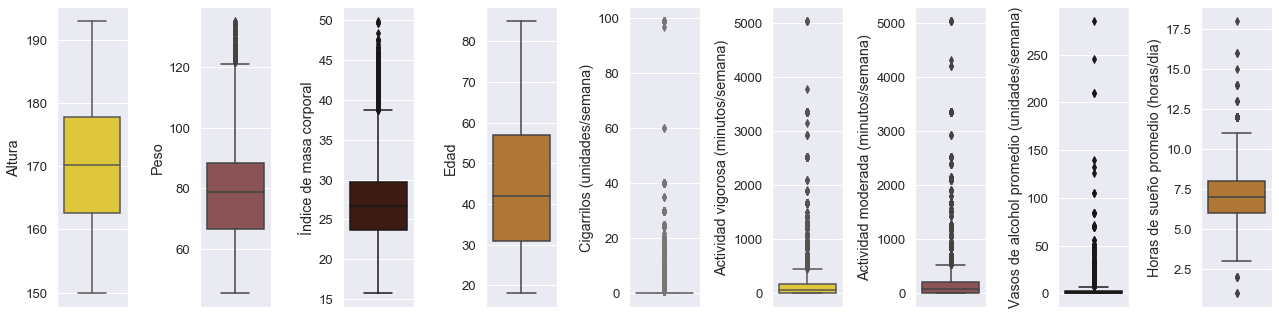

In [27]:
# Tamaño
sns.set(rc={"figure.figsize": (18, 5)})
sns.set(font_scale = 1.2)
# Figura y ejes
f, axes = plt.subplots(1, 9, sharex=False)
axes = axes.flatten()
# Colores
pal = FFox * 2

# Etiquetas para el eje
labels = [
    "Altura",
    "Peso",
    "Índice de masa corporal",
    "Edad",
    "Cigarrilos (unidades/semana)",
    "Actividad vigorosa (minutos/semana)",
    "Actividad moderada (minutos/semana)",
    "Vasos de alcohol promedio (unidades/semana)",
    "Horas de sueño promedio (horas/dia)",
]
# Subplots
for i, j in enumerate(cont.columns):
    ax = axes[i]
    sns.boxplot(data[j], orient="v", ax=ax, color = pal[i])
    ax.set_ylabel(labels[i])
# Layout
f.tight_layout()

In [28]:
f.savefig("..\\figures\\boxplot_clean.png", dpi=150, bbox_inches='tight')

In [29]:
data = data.reset_index(drop=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13470 entries, 0 to 13469
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13470 non-null  int64  
 1   REGION    13470 non-null  int64  
 2   SEX       13470 non-null  int64  
 3   AHEIGHT   13470 non-null  float64
 4   AWEIGHTP  13470 non-null  float64
 5   BMI       13470 non-null  float64
 6   AGE_P     13470 non-null  int64  
 7   RACERPI2  13470 non-null  int64  
 8   R_MARITL  13470 non-null  float64
 9   DOINGLWA  13470 non-null  float64
 10  WRKLYR4   13470 non-null  float64
 11  HYPYR1    13470 non-null  float64
 12  HYPMED2   13470 non-null  float64
 13  CHLYR     13470 non-null  float64
 14  CHLMDNW2  13470 non-null  float64
 15  ANGEV     13470 non-null  float64
 16  MIEV      13470 non-null  float64
 17  HRTEV     13470 non-null  float64
 18  STREV     13470 non-null  float64
 19  EPHEV     13470 non-null  float64
 20  COPDEV    13470 non-null  fl

In [31]:
data.to_csv(path_proc + "data_clean.csv", index=False)